In [9]:
import pandas as pd
import seaborn as sns

In [29]:
avy_df = pd.read_csv('./data/avy_rating.csv')
avy_df = avy_df.set_index('date')
wet_df = pd.read_csv('./data/avg_weather_data.csv')
wet_df = wet_df.set_index('Date')

# df = pd.merge(wet_df, avy_df, left_index=True, right_index=True)
# df.index.rename('date', inplace=True)
# df.to_csv('./data/data.csv')

In [37]:
avy_df[avy_df.index.duplicated(keep=False)]

,rating,report,problems
date,,,
2019-02-25,high,https://www.sierraavalanchecenter.org/advisory...,"['Wind Slab', 'Storm Slab']"
2019-02-25,moderate,https://www.sierraavalanchecenter.org/advisory...,['Wind Slab']
2019-02-09,high,https://www.sierraavalanchecenter.org/advisory...,"['Wind Slab', 'Storm Slab']"
2019-02-09,considerable,https://www.sierraavalanchecenter.org/advisory...,"['Wind Slab', 'Storm Slab']"
2018-03-04,considerable,https://www.sierraavalanchecenter.org/advisory...,"['Deep Slab', 'Wind Slab', 'Loose Wet']"
2018-03-04,moderate,https://www.sierraavalanchecenter.org/advisory...,"['Wind Slab', 'Deep Slab', 'Loose Wet']"
2012-03-14,considerable,https://www.sierraavalanchecenter.org/content/...,[]
2012-03-14,considerable,https://www.sierraavalanchecenter.org/content/...,[]
2012-02-16,moderate,https://www.sierraavalanchecenter.org/content/...,[]


In [58]:
updated_rating = avy_df[avy_df.index.duplicated(keep=False)][:5]

In [59]:
# updated_rating.to_csv('./data/updated_ratings.csv')

In [3]:
df = pd.read_csv('./data/data.csv')
df = df.set_index('date')

In [4]:
df.drop(['report', 'problems'], axis=1, inplace=True)
df.head()

,Snow Depth (cm) Start of Day Values,Precipitation Increment (mm),Air Temperature Average (degC),Wind Direction Average (degree),Wind Speed Average (km/hr),rating
date,,,,,,
2008-12-17,50.000000,1.066667,-11.533333,180.000000,2.800000,low
2008-12-18,43.733333,5.466667,-7.420000,236.666667,11.900000,low
2008-12-19,41.533333,9.200000,-5.860000,246.666667,15.966667,considerable
2008-12-20,44.200000,3.733333,-2.813333,192.000000,6.400000,low
2008-12-21,40.866667,14.266667,-0.206667,232.666667,8.266667,low


In [5]:
df.rating.value_counts()

moderate        928
low             539
considerable    259
high             62
na               56
extream           2
Name: rating, dtype: int64

In [6]:
low_df = df[df.rating == 'low']
mod_df = df[df.rating == 'moderate']
con_df = df[df.rating == 'considerable']
hig_df = df[df.rating == 'high']
ext_df = df[df.rating == 'extreame']

In [8]:
date = low_df.sample().index

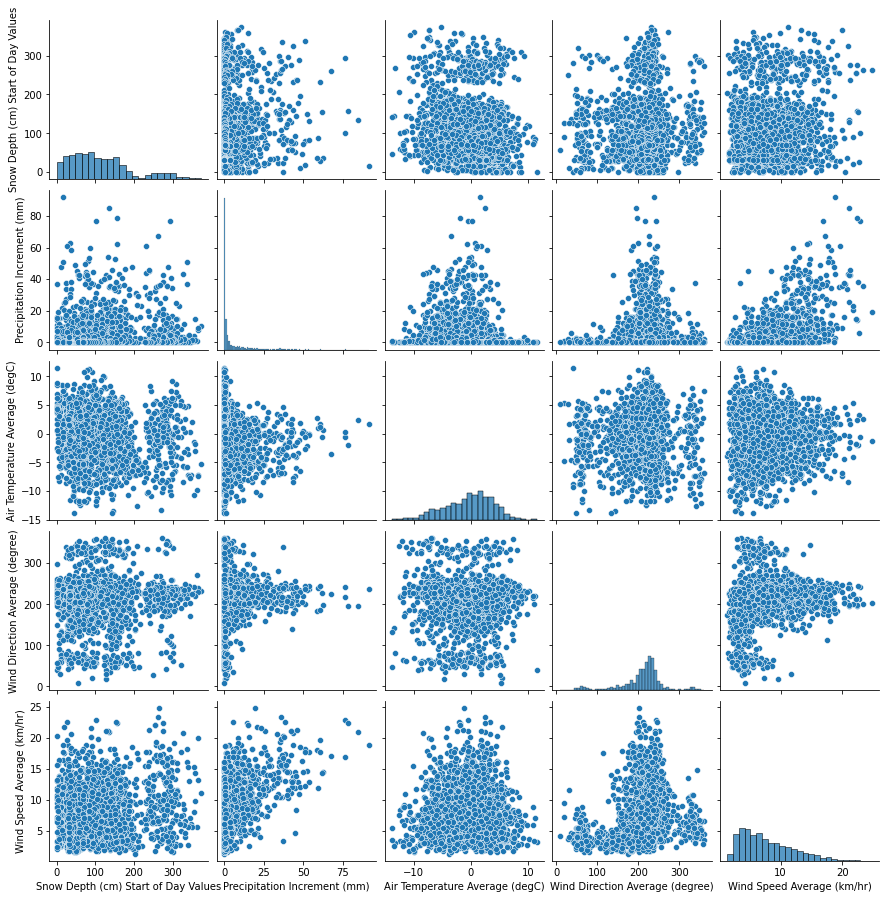

In [17]:
df_ = df.drop('rating', axis=1)
sns.pairplot(df_.reset_index())

In [18]:
values = [0, 1, 2, 3, 4, 5]
conditions = (
    df['rating'] == 'na',
    df['rating'] == 'low',
    df['rating'] == 'moderate',
    df['rating'] == 'considerable',
    df['rating'] == 'high',
    df['rating'] == 'extream',
)
df['num_rating'] = np.select(conditions, values)

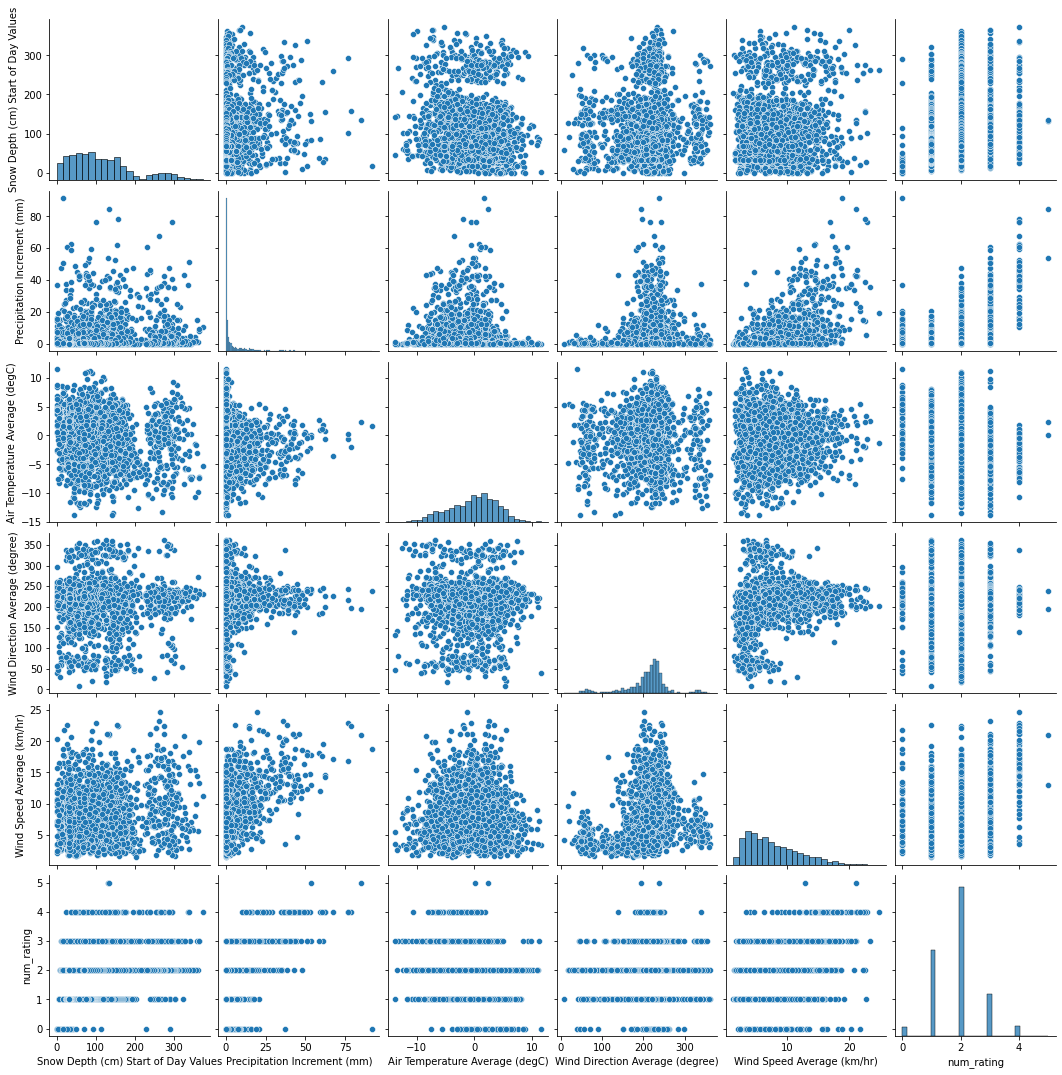

In [20]:
df_ = df.drop('rating', axis=1)
sns.pairplot(df_.reset_index())

In [25]:
len(df.index)

1846

In [24]:
len(set(df.index))

1836

,Snow Depth (cm) Start of Day Values,Precipitation Increment (mm),Air Temperature Average (degC),Wind Direction Average (degree),Wind Speed Average (km/hr),rating,num_rating
date,,,,,,,
2009-12-23,85.666667,1.000000,-4.133333,66.000000,5.333333,moderate,2
2009-12-23,85.666667,1.000000,-4.133333,66.000000,5.333333,moderate,2
2010-11-23,82.733333,35.000000,-7.020000,240.000000,13.300000,considerable,3
2010-11-23,82.733333,35.000000,-7.020000,240.000000,13.300000,considerable,3
2010-12-28,160.600000,35.600000,-0.300000,230.000000,10.566667,moderate,2
2010-12-28,160.600000,35.600000,-0.300000,230.000000,10.566667,moderate,2
2012-01-29,53.200000,0.000000,2.860000,228.000000,6.333333,low,1
2012-01-29,53.200000,0.000000,2.860000,228.000000,6.333333,low,1
2012-01-29,53.200000,0.000000,2.860000,228.000000,6.333333,low,1


In [35]:
avy_df[avy_df.index.duplicated(keep=False)].report[1
                                                ]

'https://www.sierraavalanchecenter.org/advisory/2019/feb/25/2019-02-25-065031-avalanche-forecast'